<a href="https://colab.research.google.com/github/Akashdeep-47/Python-Code/blob/master/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
x = df[['YearsExperience']]
y = df['Salary']

In [5]:
type(x)

pandas.core.frame.DataFrame

In [6]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [7]:
### Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=2)

In [8]:
### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
### Fit the model (Train the model)
model.fit(x_train, y_train)

LinearRegression()

In [10]:
### Testing (Prediction)
y_pred = model.predict(x_test)
y_pred

array([ 36239.85597261,  34336.22684101,  66697.92207822,  59083.40555182,
        91445.10078903,  80975.14056523, 101915.06101284,  52420.70359122])

In [11]:
y_test.values

array([ 46205.,  39343.,  61111.,  57189.,  98273.,  93940., 113812.,
        60150.])

In [12]:
### Calculate R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8877872430356781

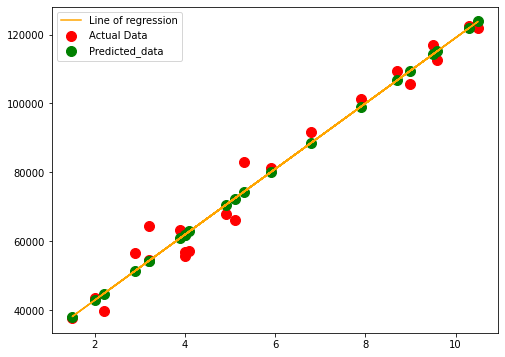

In [13]:
## Plot Line of Regression for Training Samples
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color='red', s=100, label="Actual Data")
plt.scatter(x_train, model.predict(x_train), color='green', s=100, label="Predicted_data")
plt.plot(x_train, model.predict(x_train), color='orange', label="Line of regression")
plt.legend()
plt.show()

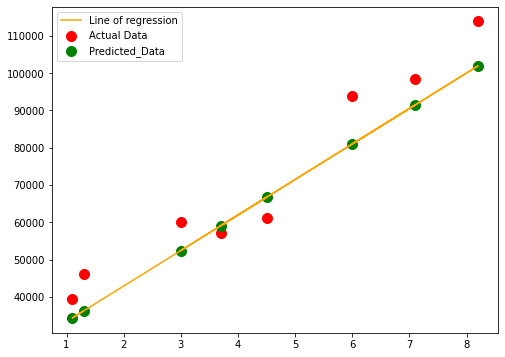

In [14]:
## Plot Line of Regression for Testing Samples
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='red', s=100, label="Actual Data")
plt.scatter(x_test, model.predict(x_test), color='green', s=100, label="Predicted_Data")
plt.plot(x_test, model.predict(x_test), color='orange', label="Line of regression")
plt.legend()
plt.show()

In [15]:
m = model.coef_
c = model.intercept_
print(m, c)

[9518.145658] 23866.266617207242


In [16]:
accuracy = []
for i in range(10000):
 x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=2)
 model1 = LinearRegression()
 model1.fit(x_train1, y_train1)
 y_pred1 = model1.predict(x_test1)
 r2_1 = r2_score(y_test1, y_pred1)
 accuracy.append(r2_1)


In [17]:
accuracy

[0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733784563,
 0.8886956733

In [18]:
np.max(accuracy)

0.8886956733784563

In [19]:
np.argmax(accuracy)

0

In [20]:
#### save the model
import joblib
joblib.dump(model, 'salary.pkl')

['salary.pkl']

In [21]:
### Load the model
mymodel = joblib.load("salary.pkl")

In [22]:
### Test New Data
mymodel.predict([[11]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([128565.86885525])

In [23]:
mymodel.predict([[11]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


128565.86885524614

In [24]:
mymodel.predict([[11],[13],[18]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([128565.86885525, 147602.16017125, 195192.88846127])